In [2]:
import seaborn as sns
sns.set_theme()

# Load the iris dataset from seaborn
iris = sns.load_dataset("iris")

# Filter the dataset to only include 'versicolor' and 'setosa' species
filtered_iris = iris[iris['species'].isin(['versicolor', 'setosa'])]

# Select only 'sepal_length' and 'sepal_width' variables
filtered_iris = filtered_iris[['sepal_length', 'sepal_width', 'species']]

# Label 'setosa' as 1 and 'versicolor' as -1
filtered_iris['species'] = filtered_iris['species'].map({'setosa': 1, 'versicolor': -1})

sepal_size_inputs = filtered_iris[['sepal_length', 'sepal_width']].to_numpy()
target_species_output = filtered_iris['species'].to_numpy()

In [ ]:
import numpy as np
import warnings
#234567891123456789212345678931234567894123456789512345678961234567897123456789
#                                python docstring limit: 72 characters |      
#                                            python code limit: 79 characters |
# test change
class SingleNeuron(object):
    """
    A class used to represent a single neuron (in the machine learning 
    sense).

    Design notes: the model type and the activation function are 
    intended to be immutable, though of course python still lets you mutate them.
    """
    type_perceptron = "perceptron"
    type_linear_regression_1D = "linear regression 1D"

    def sign(input_value):
        """ 

        """
        if input_value >= 0:
            return 1
        else: 
            return -1
        
    def linear_1D(input_value):
        """ 

        """
        return input_value
    
    # default_activation_function = sign

    # def test_for_matching_ndarrays(var_1, var_2):
    #     return type(var_1) != np.ndarray or type(var_2) != np.ndarray \
    #            or var_1.shape != var_1.shape

    def perceptron_loss_function(predicted_outputs, 
                                 target_outputs):
        """ 
        
        """
        # if SingleNeuron.test_for_matching_ndarrays(predicted_values, true_values) == False:
        #     raise TypeError
        return (1/4) * np.sum((predicted_outputs - target_outputs)**2)
    
    def perceptron_stochastic_gradient(predicted_output, 
                                       target_output):
        """ 
        
        """
        return (1/2) * (predicted_output - target_output)

    def linear_regression_loss_function(predicted_outputs, 
                                        target_outputs):
        """ 
        
        """
        # if SingleNeuron.test_for_matching_ndarrays(predicted_values, true_values) == False:
        #     raise TypeError
        return (1/(2*target_outputs.size)) * np.sum((predicted_outputs - target_outputs)**2)
        
    def linear_regression_1D_stochastic_gradient(predicted_output, 
                                                 target_output, 
                                                 training_data_length):
        """ 
        
        """
        return (1/training_data_length) * (predicted_output - target_output)

    def preactivation(input_vector, weights, bias):
        """ 
        
        """
        assert np.shape(input) is np.shape(weights), \
                "Input vector must have the same shape as weights vector." \
                + f"{np.shape(input) = },  {np.shape(weights) = }"
        return np.dot(input, weights) + bias
    
    def __init__(self, 
                 data_dimension, 
                 model_type, 
                 weights=None, 
                 bias=None, 
                 activation_function=None):
        """
        
        """
        self.data_dimension = data_dimension 
        # A single number for each feature vector has dimension 1, 
        # a 2D vector has dimension 2, etc.

        self.model_type = model_type

        if activation_function is None:
            if self.model_type == SingleNeuron.type_perceptron:
                self.activation_function = SingleNeuron.sign
            elif self.model_type == SingleNeuron.type_linear_regression_1D:
                self.activation_function = SingleNeuron.linear_1D
        else:
            self.activation_function = activation_function
        
        if weights is None:
            self.weights = np.random.randn(data_dimension)
        else:
            self.weights = weights
        self.previous_weights = self.weights

        if bias is None:
            self.bias = np.random.randn()
        else:
            self.bias = bias
        self.previous_bias = self.bias

    def predict_outputs(self, 
                        inputs, 
                        weights=None, 
                        bias=None, 
                        use_current_weights_and_bias=True):
        """ 
        sets "use_current_weights_and_bias" to False to prevent extra assignments in predict_single_output
        """
        if use_current_weights_and_bias:
            weights = self.weights
            bias = self.bias

        assert (np.isscalar(inputs) and self.data_dimension == 1) \
                or ((not np.isscalar(inputs)) and inputs.shape[-1] == self.data_dimension), \
                    "Prediction: mismatch between expected feature vector " \
                        + f"\ndimension ({self.data_dimension = }) and input " \
                        + f"shape ({np.shape(inputs) = })."
        
        if ((not np.isscalar(inputs)) and len(inputs.shape) == 1):
            return self.activation_function(SingleNeuron.preactivation(inputs, weights, bias))
        else:
            return [self.activation_function(SingleNeuron.preactivation(input, weights, bias)) for input in inputs]
    
    def current_weights(self):
        """ 
        
        """
        return self.weights.copy()
    
    def current_bias(self):
        """ 
        
        """
        return self.bias

    def current_weights_and_bias(self):
        """ 
        
        """
        return (self.weights.copy(), self.bias)
    
    def perceptron_stochastic_gradient_update(self, 
                                              input, 
                                              target_output, 
                                              learning_rate=None):
        """ 
        learning_rate does nothing and is just for making it more uniform to pass around update functions
        """
        gradient = SingleNeuron.perceptron_stochastic_gradient(self.predict_multiple_outputs(input_vector), target_output)
        self.weights -= gradient * input_vector
        self.bias -= gradient
        return gradient

    def linear_regression_1D_stochastic_gradient_update(self, 
                                                        input, 
                                                        target_output, 
                                                        learning_rate):
        gradient = SingleNeuron.linear_regression_1D_stochastic_gradient(self.predict_outputs(input), target_output)
        self.weights -= learning_rate * gradient * input
        self.bias -= learning_rate * gradient
        return gradient
        
    def train(self, 
              inputs, 
              target_outputs, 
              learning_rate=0.5, 
              num_epochs=50):
        """ 
        
        """
        self.previous_weights = np.copy(self.weights)
        self.previous_bias = np.copy(self.bias.copy())
        # if self.model_type != SingleNeuron.type_perceptron and (learning_rate == None or epochs == None):
        #     raise ValueError("learning_rate and epochs must be specified for non-perceptron models")
        weight_bias_update = None
        loss_function = None
        if self.model_type is SingleNeuron.type_perceptron:
            weight_bias_update = self.perceptron_stochastic_gradient_update
            loss_function = SingleNeuron.perceptron_loss_function
        elif self.model_type is SingleNeuron.type_linear_regression_1D:
            weight_bias_update = self.linear_regression_1D_stochastic_gradient_update
            loss_function = SingleNeuron.linear_regression_loss_function

        loss_at_epoch = np.empty(1 + num_epochs)
        loss_at_epoch[0] = loss_function(self.predict_multiple_outputs(input_vectors), target_outputs)

        for epoch_index in range(num_epochs):
            for input, target_output in zip(input_vectors, target_outputs):
                weight_bias_update(input, target_output, learning_rate)
            loss_at_epoch[epoch_index+1] = loss_function(self.predict_multiple_outputs(input_vectors), target_outputs)

        return loss_at_epoch

    def reset_model(self):
        """ 
        
        """
        self.weights = np.random.randn(self.weights.size)
        self.bias = np.random.randn()

    def forget_previous_training(self):
        """ 
        
        """
        self.weights = np.copy(self.previous_weights)
        self.bias = np.copy(self.previous_bias)

# todo
    def __repr__(self):
        """ 
        
        """
        return self
    
# might not be necessary
    # def __call__(self):
    #     return self

In [57]:
model = SingleNeuron(sepal_size_inputs.shape[1], model_type="perceptron")
model.current_weights_and_bias()

(array([-0.26193599,  0.7262786 ]), array(0.251941))

In [104]:
model.reset_model()
model.current_weights_and_bias()

(array([-0.34113033, -1.66080523]), array(0.51203091))

SingleNeuron.perceptron_loss_function(predicted_outputs, target_species_output) = 50.0


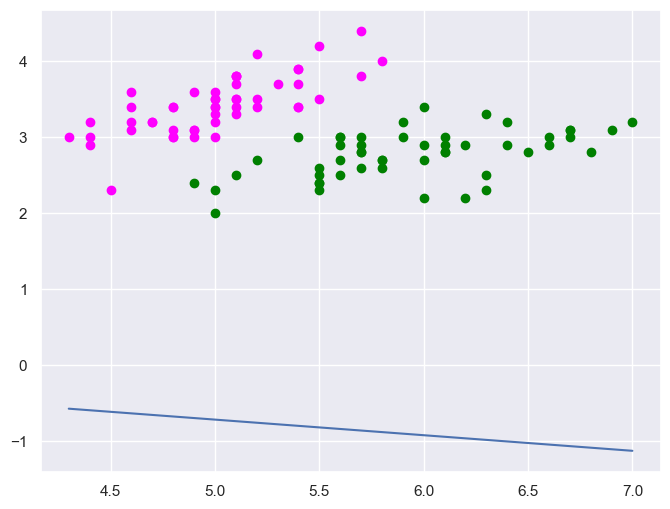

In [105]:
predicted_outputs = model.predict_multiple_outputs(sepal_size_inputs)
print(f"{SingleNeuron.perceptron_loss_function(predicted_outputs, target_species_output) = }")
#hmm... why is this consistently outputting 50...
plt.figure(figsize=(8,6))
plt.scatter(sepal_size_inputs[target_species_output == 1, 0], 
            sepal_size_inputs[target_species_output == 1, 1], 
            color="magenta", label="Setosa (1)")
plt.scatter(sepal_size_inputs[target_species_output == -1, 0], 
            sepal_size_inputs[target_species_output == -1, 1], 
            color="green", label="Versicolor (-1)")
x = np.linspace(sepal_size_inputs[:,0].min(), sepal_size_inputs[:,0].max())
plt.plot(x, (-model.weights[0]*x - model.bias) / model.weights[1]) 

#Oh it's constantly outputting 50 because it's getting 50 values wrong most of the time!

In [70]:
print(f"{model.predict_single_output(sepal_size_inputs[0]) = }")
print(f"{model.predict_multiple_outputs(sepal_size_inputs[0:3]) = }")

model.predict_single_output(sepal_size_inputs[0]) = 1
model.predict_multiple_outputs(sepal_size_inputs[0:3]) = [1, 1, 1]


In [67]:
preactivation_value = SingleNeuron.preactivation(sepal_size_inputs[0], model.weights, model.bias)
print(f"{preactivation_value = }")
print(f"{model.activation_function(preactivation_value) = }")

preactivation_value = 1.4580425226759062
model.activation_function(preactivation_value) = 1


In [57]:
print(f"{[sepal_size for sepal_size in sepal_size_inputs[0,:]] = }")

[sepal_size for sepal_size in sepal_size_inputs[0,:]] = [5.1, 3.5]


In [66]:
sepal_size_inputs[0].ndim

1

In [49]:
print(f"{SingleNeuron.preactivation(sepal_size_inputs[0], model.weights, model.bias) = }")
print(f"{np.dot(sepal_size_inputs[0], model.weights) + model.bias = }")

SingleNeuron.preactivation(sepal_size_inputs[0], model.weights, model.bias) = -11.32477314232071
np.dot(sepal_size_inputs[0], model.weights) + model.bias = -11.32477314232071


In [47]:
print(f"{SingleNeuron.sign(-0.00001) = }")
print(f"{SingleNeuron.linear_1D(523/100) = }")

SingleNeuron.sign(-0.00001) = -1
SingleNeuron.linear_1D(523/100) = 5.23


In [33]:
sepal_size_inputs.shape

(100, 2)

In [6]:
sepal_size_inputs[target_species_output==1,1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [58]:
print(f"{neuron_test.current_weights_and_bias() = }")
[current_weights, current_bias] = neuron_test.current_weights_and_bias()
print(f"{sepal_size_inputs[1] = }")
print(f"{SingleNeuron.preactivation(sepal_size_inputs[1], current_weights, current_bias) = }")
preactivation_value = SingleNeuron.preactivation(sepal_size_inputs[1], current_weights, current_bias)
print(f"{neuron_test.activation_function(preactivation_value) = }")
print(f"{neuron_test.predict_outputs(sepal_size_inputs[1]) = }")
inputs = sepal_size_inputs
activation_values = [neuron_test.activation_function(SingleNeuron.preactivation(input, current_weights, current_bias)) for input in inputs]
print(f"{activation_values = }")
print(f"{neuron_test.predict_outputs(inputs) = }")

neuron_test.current_weights_and_bias() = (array([-1.04808694,  2.89509232]), -2.0549427790680297)
sepal_size_inputs[1] = array([4.9, 3. ])
SingleNeuron.preactivation(sepal_size_inputs[1], current_weights, current_bias) = np.float64(1.494708141533946)
neuron_test.activation_function(preactivation_value) = 1
neuron_test.predict_outputs(sepal_size_inputs[1]) = 1
activation_values = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]
neuron_test.predict_outputs(inputs) = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
[(SingleNeuron.sign(SingleNeuron.preactivation(input, neuron_test.current_weights(), neuron_test.current_bias()))) for input in sepal_size_inputs[1]]

In [ ]:
SingleNeuron.sign(np.float64(3.3034947687319463))

In [ ]:
print(f"{SingleNeuron.sign(0) = }")
print(f"{SingleNeuron.linear_1D(8.3) = }")

In [ ]:
print(f"{sepal_size_inputs.shape = }")
print(f"{sepal_size_inputs.shape[1] = }")
print(f"{sepal_size_inputs[1] = }")

In [ ]:
x = np.random.randn(3)
type(x) == np.ndarray

In [ ]:
y = np.random.randn(4)

In [ ]:
np.dot(x,y)

In [ ]:
np.dot(2,4)

In [ ]:
for xval in x:
    print(xval)

In [20]:
a = np.zeros((2,2))
b = np.copy(a)
a[0,0] = 1
a[1,0] = 2
print(a)
print(b)
print(np.copy(3))

[[1. 0.]
 [2. 0.]]
[[0. 0.]
 [0. 0.]]
3


In [16]:
print([A for A in a])

[array([1., 0.]), array([2., 0.])]
